## Assignment 2

Marissa Berk

The data used were collected from activity trackers. Activity trackers are applications that track your activity using your smartphone, a smartwatch, wrist band or a clip-on device. Popular applications include Steps (iPhone), Apple Watch, Fitbit and Jawbone. For a study in France, over 900 volunteers received a Fitbit Zip (a clip-on activity tracker) and recorded their daily steps, distance and calories.


In this assignment I will combine two datasets and investigate the distribution of a single variable.


In [2]:
# importing for drawing plots
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

step_data will contain the data from the file steps.csv and survey_data will contain the data from the file survey.csv

In [3]:
# open the dataframes with the right separators
step_data = pd.read_csv("steps.csv", sep=";")
survey_data = pd.read_csv("survey.csv")

In [4]:
# merge the two dataframes and show the head of the dataframe
df = survey_data.merge(step_data, on = "id")
df.head(5)


,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Analyzing mean steps per participant

Create the variable mean steps per participant

Combine Pandas .loc and .mean() with the right axis argument for mean(). 

In [5]:
mean_steps = df.loc[:,"20-6-2013":"13-5-2014"].mean() #get the mean over the columns (all the dates) and store

mean_steps.index #the indexes now contain the dates

Index(['20-6-2013', '21-6-2013', '22-6-2013', '23-6-2013', '24-6-2013',
       '25-6-2013', '26-6-2013', '27-6-2013', '28-6-2013', '29-6-2013',
       ...
       '4-5-2014', '5-5-2014', '6-5-2014', '7-5-2014', '8-5-2014', '9-5-2014',
       '10-5-2014', '11-5-2014', '12-5-2014', '13-5-2014'],
      dtype='object', length=328)

Show the data frame head.


In [6]:
mean_steps.head()

20-6-2013     3642.416667
21-6-2013     9034.724280
22-6-2013    10889.636691
23-6-2013     7402.847973
24-6-2013     8110.370056
dtype: float64

Now to make the plot. We make the plot in Seaborn (sns) and then change settings in Matplotlib (plt)

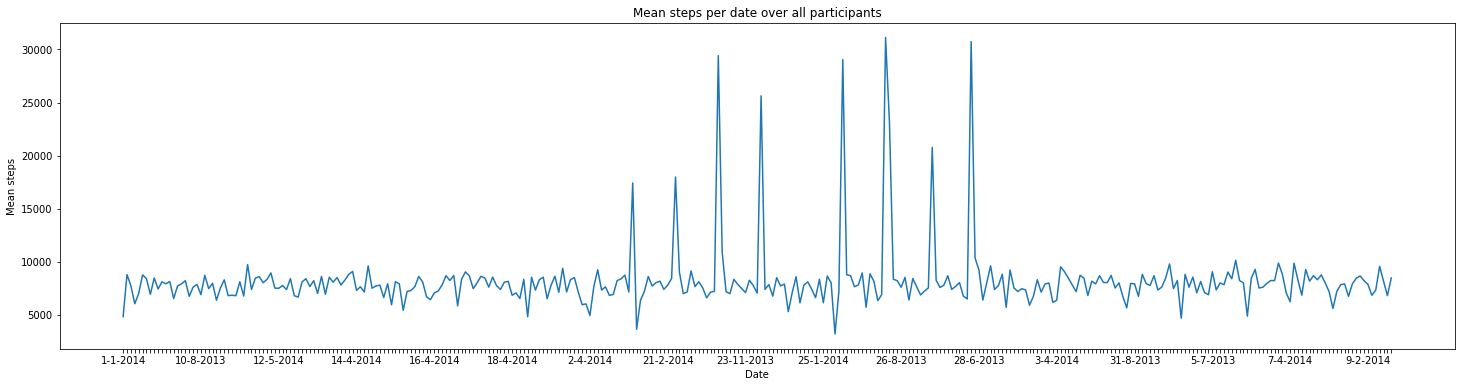

In [7]:
plt.figure(figsize=(25, 6)) #set the figure ("canvas") size
plot = sns.lineplot(x=mean_steps.index, y=mean_steps) #create the plot

#Now a tricky part. If we plot all the dates, they overlap. So we need to make some ticks invisible. 

for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 20 == 0:  # every 20th label is kept
                label.set_visible(True)
    else:
        label.set_visible(False)

plt.title("Mean steps per date over all participants") #set the title
plt.xlabel("Date") #set the x-label
plt.ylabel("Mean steps") #set the y-label

plt.show() #show the plot

## Mean steps related to height & weight

Now we will look at how the mean steps per participant relates to the height and weight of the participants.

To do this we must create a new column in the data set for mean steps. Next we remove the outliers and then create a subset of the dataframe.

In [11]:
#merge data frame by id
df_merge = pd.merge(step_data, survey_data, on = 'id')

#create column with mean steps per participant
df_merge = df_merge.assign(mean_of_steps=df_merge.mean(axis=1))
df_merge["mean_of_steps"] = df_merge["mean_of_steps"].round() #round the mean value
df_merge = df_merge[(df_merge['mean_of_steps'] < 20000) & (df_merge['weight'] > 40) &(df_merge['weight'] < 200) & (df_merge['height'] > 0)] #remove unlikely outliers

#create new data frame with mean_of_steps, weight, height to work on in the later step
df_subset = df_merge[["mean_of_steps", "weight", "height"]]
df_subset.dropna() #remove row with Nan value

df_subset.head()

,mean_of_steps,weight,height
0,9907.0,98.0,178.0
1,5520.0,77.0,180.0
2,8032.0,83.0,180.0
3,2917.0,80.0,178.0
4,4866.0,61.0,167.0


## Correlation Matrix

Below is a correlation matrix of the variables weight, height & mean steps.

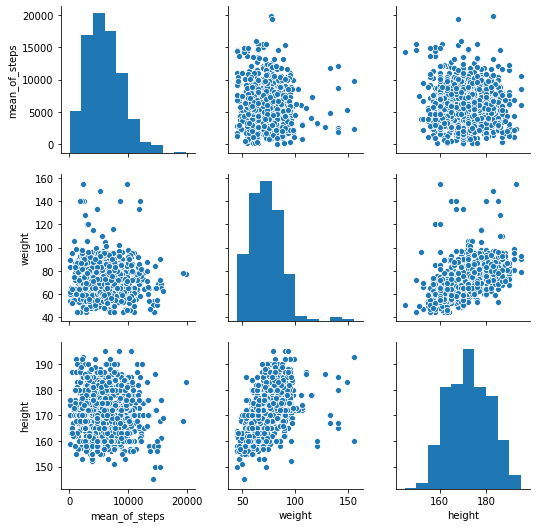

In [12]:
sns.pairplot(df_subset)
plt.show()

## Mean steps by weight

Below is a scatter plot showing the average number of steps taken per day per participant by weight of the participants.

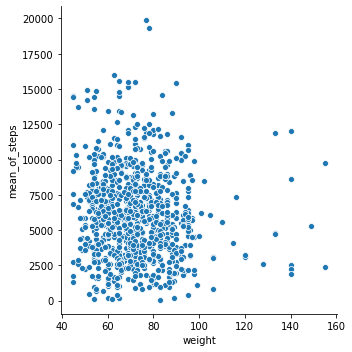

In [13]:
sns.relplot(x="weight", y="mean_of_steps", data=df_subset)

Generally, as the participants weight increases, the average number of steps per day decreases. 

The graph below shows this same relationship but uses a linear regression line to show the negative relationship.

The shading shows the most common weights (these appear darker).

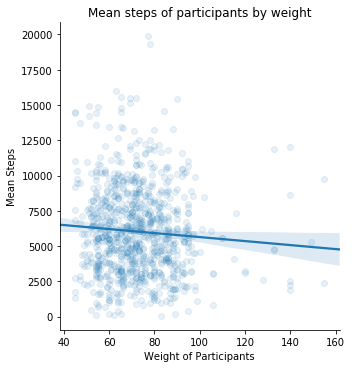

The pearson r is:
(-0.07141162457225216, 0.030595149063235023)


In [21]:
sns.lmplot(x='weight', y='mean_of_steps', data=df_subset, scatter_kws={'alpha':0.1}) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Weight of Participants') #use matplotlib to refine Seaborn plot
plt.ylabel('Mean Steps')
plt.title('Mean steps of participants by weight')
plt.show()

from scipy.stats.stats import pearsonr #import this for pearson r
print("The pearson r is:")
print(pearsonr(df_subset['mean_of_steps'],df_subset['weight'])) #calculate the pearson r for mean steps and weight


The pearson r (and the regression line) show that there is a slight negative correlation between mean steps and weight. 

This means that as the weight of the participants increases, the average number of steps taken per day decreases.

## Mean steps by height

Below is a scatter plot showing the average number of steps taken per day per participant by height of the participants.

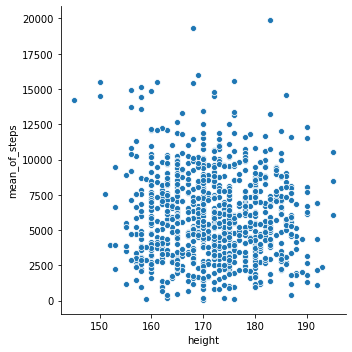

In [23]:
sns.relplot(x="height", y="mean_of_steps", data=df_subset)

The relationship of mean steps and height is not as clear as weight. Let's include the linear regression and pearson r value to better understand the relationship.

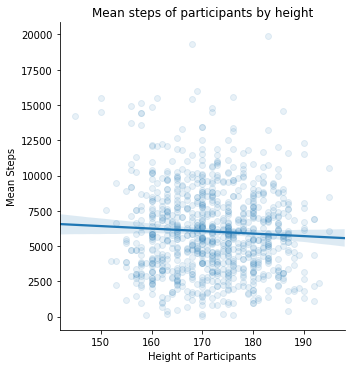

The pearson r is:
(-0.05225923490181976, 0.11377821833317206)


In [22]:
sns.lmplot(x='height', y='mean_of_steps', data=df_subset, scatter_kws={'alpha':0.1}) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Height of Participants') #use matplotlib to refine Seaborn plot
plt.ylabel('Mean Steps')
plt.title('Mean steps of participants by height')
plt.show()

from scipy.stats.stats import pearsonr #import this for pearson r
print("The pearson r is:")
print(pearsonr(df_subset['mean_of_steps'],df_subset['height'])) #calculate the pearson r for mean steps and weight


The regression line & pearson r shows that there is a slight negative correlation between mean steps and height. 

This means that as the height of the participants increases, the average number of steps taken per day decreases slightly.


## Mean steps related to gender & education

In order to plot these new variables we must first make another subset of the data frame.

In [28]:

#create new data frame with mean_of_steps, weight, height to work on in the later step
df_subset2 = df_merge[["mean_of_steps", "gender", "education_1"]]
df_subset2.dropna() #remove row with Nan value

df_subset2.head()

,mean_of_steps,gender,education_1
0,9907.0,Male,Master or doctorate
1,5520.0,Male,Bachelor
2,8032.0,Male,Master or doctorate
3,2917.0,Male,Bachelor
4,4866.0,Female,Bachelor


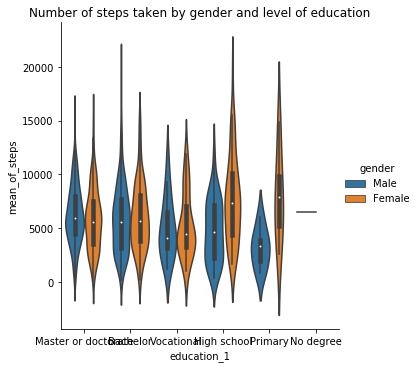

In [61]:
sns.catplot(x="education_1", y="mean_of_steps", hue="gender",kind="violin", data=df_subset2)
plt.title('Number of steps taken by gender and level of education')

plt.show()

The violin plot above shows that on average, the males and females with a highschool education took the most amount of steps per day.

## Relationship of gender and education

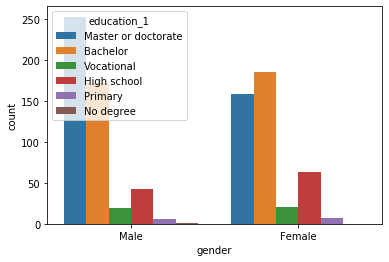

In [27]:

sns.countplot(x="gender", hue="education_1", data=df)
plt.show()

On average, the majority of males in the study had an education level of MAster or Doctorate. And the majority of females in the study had an education level of bachelor.

In [73]:
df_subset2 = df_merge[["mean_of_steps", "gender", "education_1"]]
df_subset2.dropna() #remove row with Nan value

df_subset2.head()

,mean_of_steps,gender,education_1
0,9907.0,Male,Master or doctorate
1,5520.0,Male,Bachelor
2,8032.0,Male,Master or doctorate
3,2917.0,Male,Bachelor
4,4866.0,Female,Bachelor


In [79]:
corr = df[['gender', 'education_1']].corr() 
corr

""
